In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv("country_clusters.csv")

In [17]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({"English":0, "French":1, "German":2})

In [18]:
x = data_mapped.iloc[:,1:4]
kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identified_clusters

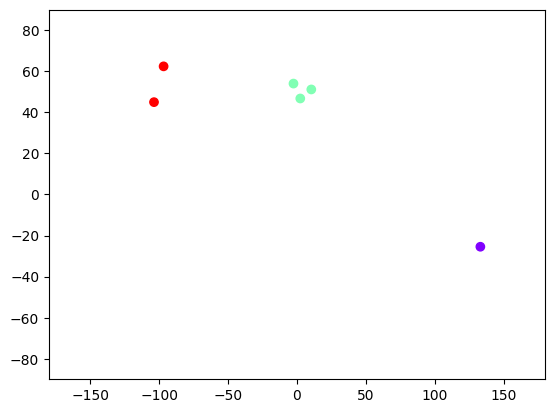

In [20]:
plt.scatter(
    data_with_clusters["Longitude"],
    data_with_clusters["Latitude"],
    c=data_with_clusters["Cluster"],
    cmap="rainbow"
)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [21]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

number_of_clusters = range(1,7)

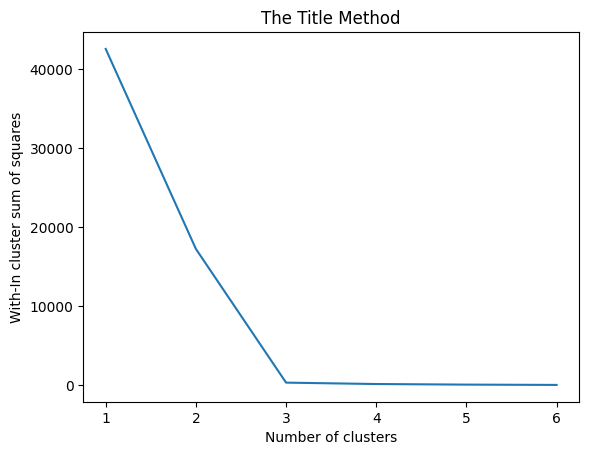

In [22]:
plt.plot(number_of_clusters,wcss)
plt.title("The Title Method")
plt.xlabel("Number of clusters")
plt.ylabel("With-In cluster sum of squares")
plt.show()